# Deep learning Project

## Predicting County Suitability for Various CO2 Removal Technologies in Virginia

**Motivation:**

Carbon removal is a broad set of approaches, some natural and some engineered, used to remove CO2 from the atmosphere. The approaches can be as simple as reforestation, or as complex as growing bioenergy crops for producing bioenergy with carbon capture. We will develop a various Neural Networks to predict how suitable land is for various CO2 removal techniques in VA at the county scale. This will help researchers with the goal of reducing carbon emissions by providing information on how to utilize available and suitable land for reforestation plans,  enhanced weathering (EW), and biochar.


**Technical plan:**

We will input GGR technique specific predictor variables into an unsupervised algorithm, KMeans, to assign a ‘suitability level’ to each county in VA. Next, these labeled counties will be fed into a feed-forward neural network, a simple ANN, and a deep and cross neutal network. The neural nets will output the ‘suitability level’ for implementing the CO2 removal techniques of reforestation, EW, and biochar respectively. We will create our own models and utilize pre-trained moels like the MLPClassifier from sklearn. 


# Code for Hierarchical Clustering to obtain labels (suitability category)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Set seed for whole notebook
import random
random.seed(10)
import torch
torch.manual_seed(1)

In [3]:
#Loading locational dataset
df = pd.read_csv('final-scaled-df.csv', index_col='FIPS')
df.head(20)

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest,Agriculture,Watershed,Biomass,Power,Water Availability,Log_Bio,Log_Water,Log_Power
FIPS,,,,,,,,,,,,,,,,,,,
51001,0.075854,0.148920,0.319901,0.435870,0.410805,0.412876,0.398849,0.223717,0.178736,0.296552,0.064338,0.289624,1,0.185901,0.601097,0.020793,0.606148,0.417871,0.931630
51003,0.108095,0.182011,0.281478,0.361577,0.330150,0.398268,0.652957,0.669414,0.672845,0.580575,0.679813,0.081093,1,0.354645,0.494455,0.157825,0.754033,0.718885,0.000000
51005,0.187226,0.147870,0.208440,0.382735,0.309672,0.361536,0.590581,0.651482,0.660489,0.531379,0.897165,0.020858,1,0.654945,0.494455,0.083128,0.898739,0.622105,0.000000
51007,0.157467,0.144258,0.319836,0.347694,0.488828,0.370654,0.753323,0.808243,0.809483,0.716207,0.651586,0.155517,1,0.648261,0.515919,0.018988,0.896297,0.404927,0.861198
51009,0.184217,0.145333,0.205452,0.416978,0.325681,0.367647,0.499006,0.525380,0.539368,0.463678,0.770831,0.072140,1,0.236541,0.502679,0.145085,0.660592,0.706138,0.819049
51011,0.140248,0.158561,0.278259,0.427413,0.398133,0.403431,0.427002,0.337238,0.280747,0.347356,0.662506,0.159655,1,0.099752,0.516467,0.082587,0.471095,0.621123,0.862305
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268,0.001349,1,0.101754,0.494455,0.023823,0.475250,0.437398,0.000000
51015,0.197927,0.147820,0.225123,0.379990,0.321457,0.383072,0.615071,0.686479,0.682759,0.561379,0.582228,0.137797,1,0.421279,0.494455,0.126500,0.794329,0.685401,0.000000
51017,0.382682,0.130588,0.262562,0.372108,0.370891,0.394608,0.681005,0.768185,0.779741,0.641724,0.899831,0.020852,1,0.165266,0.000000,0.098558,0.579941,0.647728,0.000000


In [4]:
TEST_RATIO = 0.2
BATCH_SIZE = 64

size_all = len(df)

# training/val/test dataset
size_train = size_all - 6
size_val = int(size_train * TEST_RATIO)
size_train_sub = size_train - size_val

# split data into train and test
# Test = 6 counties of interst: Accomack, Fauquier, Greensville, Hanover, Rockingham, Wise
dataset_val = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]

# Train = all except 6 counties of interest
dataset_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])


In [5]:
cols = ['Income', 'DSCI', 'PQ1', 'PQ2', 'PQ3', 'PQ4', 'TQ1', 'TQ2', 'TQ3', 'TQ4', 'Forest', 
        'Agriculture', 'Biomass', 'Power', 'Water Availability', 'Watershed',
       'Log_Bio','Log_Water','Log_Power']
cols_rf = ['PQ1', 'PQ2', 'PQ3', 'PQ4', 'TQ1', 'TQ2', 'TQ3', 'TQ4', 'Forest','Water Availability', 'Log_Water']
cols_ew = ['PQ1', 'PQ2', 'PQ3', 'PQ4', 'TQ1', 'TQ2', 'TQ3', 'TQ4', 'Income', 'Power', 'Log_Power', 'Agriculture']
cols_bio = ['PQ1', 'PQ2', 'PQ3', 'PQ4', 'TQ1', 'TQ2', 'TQ3', 'TQ4', 'Income', 'Biomass', 'Log_Bio','Agriculture']

# Using the elbow method to determine the k value to be applied
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[cols])
    sse.append(km.inertia_)

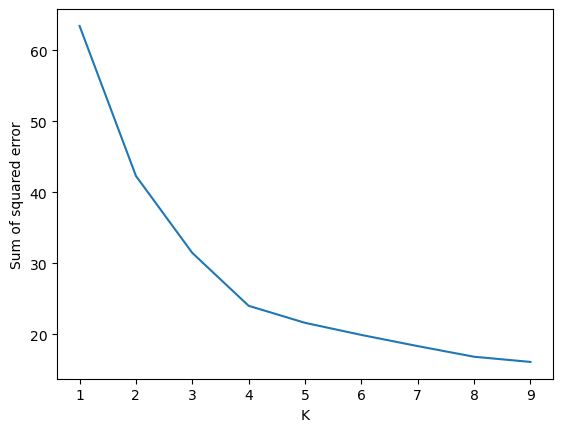

In [6]:
# Plot to obtain elbow
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [7]:
# create clusters using k value = 4
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [8]:
# Determining mean cluster characterisitics REFORESTATION
y_hc = hc.fit_predict(dataset_train[cols_rf])
dataset_train['Reforest'] = y_hc
dataset_train.sort_values("Reforest", inplace = True, ascending=True)

#average input vars by cluster
df_rfcluster = dataset_train.groupby('Reforest').mean()


# Determining mean cluster characterisitics ENHANCED WEATHERING
y_hc = hc.fit_predict(dataset_train[cols_ew])
dataset_train['EW'] = y_hc
dataset_train.sort_values("EW", inplace = True, ascending=True)

#average input vars by cluster
df_ewcluster = dataset_train.groupby('EW').mean()


# Determining mean cluster characterisitics BIOCHAR
y_hc = hc.fit_predict(dataset_train[cols_bio])
dataset_train['Biochar'] = y_hc
dataset_train.sort_values("Biochar", inplace = True, ascending=True)

#average input vars by cluster
df_biocluster = dataset_train.groupby('Biochar').mean()

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: ylabel='Biochar'>

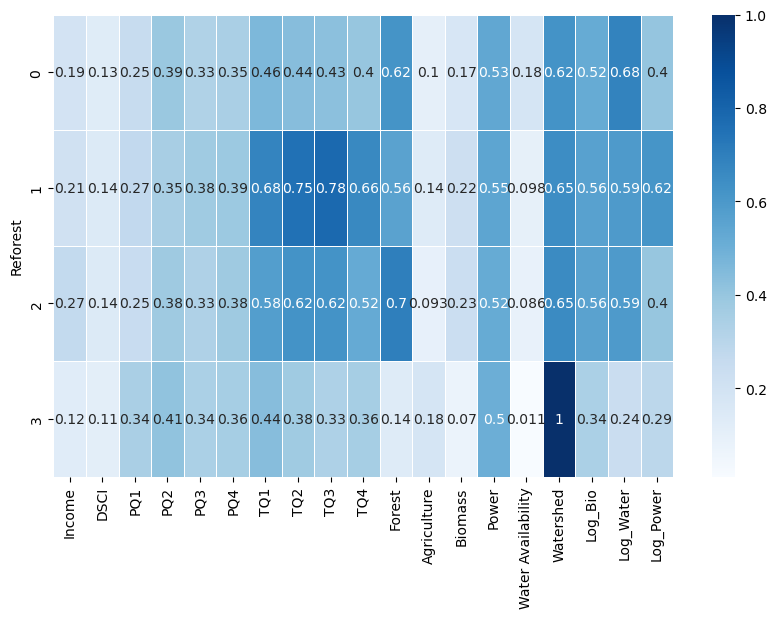

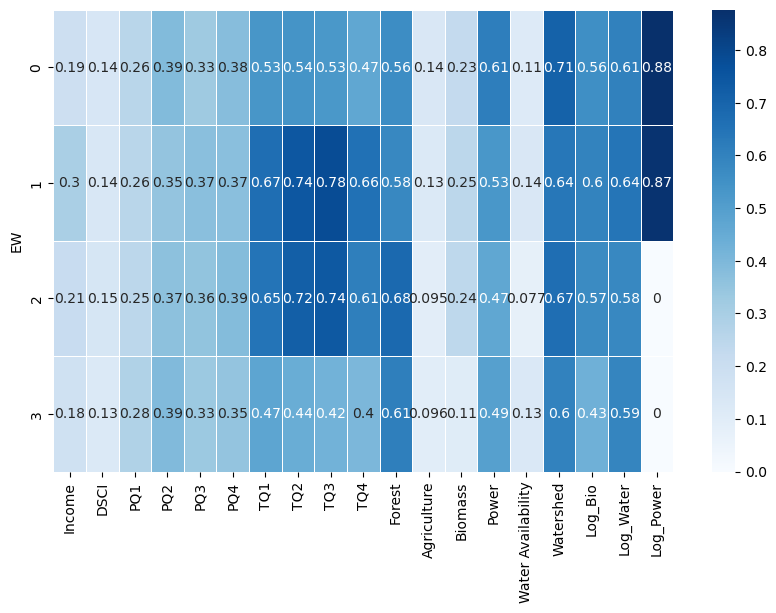

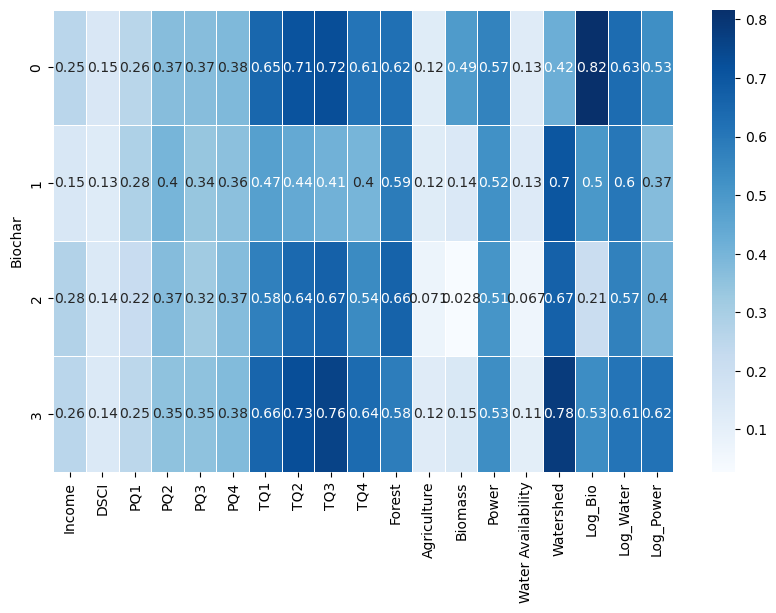

In [9]:
#Heatmap of cluster characteristics reforestation
plt.figure(figsize=(10,6))
sns.heatmap(df_rfcluster[cols], annot=True, cmap="Blues", linewidths=.5)

plt.figure(figsize=(10,6))
sns.heatmap(df_ewcluster[cols], annot=True, cmap="Blues", linewidths=.5)

plt.figure(figsize=(10,6))
sns.heatmap(df_biocluster[cols], annot=True, cmap="Blues", linewidths=.5)

In [10]:
# see how clusters are distributed
dataset_train['Reforest'].value_counts()

1    31
2    26
0    24
3     3
Name: Reforest, dtype: int64

In [11]:
dataset_train['EW'].value_counts()

0    24
1    22
3    20
2    18
Name: EW, dtype: int64

In [12]:
dataset_train['Biochar'].value_counts()

1    30
3    23
0    19
2    12
Name: Biochar, dtype: int64

In [13]:
# Look at counties in smallest cluster
dataset_train[dataset_train['Reforest'] == 3]

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,...,Watershed,Biomass,Power,Water Availability,Log_Bio,Log_Water,Log_Power,Reforest,EW,Biochar
FIPS,,,,,,,,,,,,,,,,,,,,,
51115,0.131867,0.118457,0.362594,0.415861,0.354178,0.358072,0.411094,0.293565,0.254598,0.315172,...,1,0.006277,0.494455,0.000000,0.076886,0.000000,0.00000,3,3,1
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,...,1,0.101754,0.494455,0.023823,0.475250,0.437398,0.00000,3,3,1
51131,0.099351,0.117189,0.439573,0.415893,0.389930,0.397124,0.467713,0.404628,0.346264,0.386092,...,1,0.100844,0.519490,0.007939,0.473371,0.285964,0.86796,3,0,1


# Test Train Split

In [14]:
from sklearn.model_selection import train_test_split

# creating input identity
sub_df = dataset_train[cols]
X = sub_df
y = dataset_train[['Reforest','EW','Biochar']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [15]:
X_train_rf = X_train[cols_rf]
X_train_ew = X_train[cols_ew]
X_train_bio = X_train[cols_bio]

X_test_rf = X_test[cols_rf]
X_test_ew = X_test[cols_ew]
X_test_bio = X_test[cols_bio]

y_train_rf = y_train[['Reforest']]
y_train_ew = y_train[['EW']]
y_train_bio = y_train[['Biochar']]

y_test_rf = y_test[['Reforest']]
y_test_ew = y_test[['EW']]
y_test_bio = y_test[['Biochar']]

In [16]:
y_train['Reforest'].value_counts()

1    23
2    22
0    19
3     3
Name: Reforest, dtype: int64

In [17]:
y_test['EW'].value_counts()

1    7
0    5
3    3
2    2
Name: EW, dtype: int64

In [18]:
y_test['Biochar'].value_counts()

3    8
1    5
2    3
0    1
Name: Biochar, dtype: int64

# Supervised Neural Nets for suitability prediction

## Simple ANN

In [19]:
# loading everything that might be helpful
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
import torch
from torch.utils.data import DataLoader, random_split
from torch import Generator
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch import manual_seed as torch_manual_seed
import random
import numpy as np

from torch.cuda import max_memory_allocated, set_device, manual_seed_all
from torch.backends import cudnn

In [20]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [21]:
dataset_val_rf = dataset_val[cols_rf]
dataset_val_ew = dataset_val[cols_ew]
dataset_val_bio = dataset_val[cols_bio]

In [22]:
# Make data into tensor objects
X_train_rf_tensor = torch.tensor(X_train_rf.values, dtype=torch.float32)
X_train_ew_tensor = torch.tensor(X_train_ew.values, dtype=torch.float32)
X_train_bio_tensor = torch.tensor(X_train_bio.values, dtype=torch.float32)

X_test_rf_tensor = torch.tensor(X_test_rf.values, dtype=torch.float32)
X_test_ew_tensor = torch.tensor(X_test_ew.values, dtype=torch.float32)
X_test_bio_tensor = torch.tensor(X_test_bio.values, dtype=torch.float32)

y_train_rf_tensor = torch.tensor(y_train_rf['Reforest'].values, dtype=torch.float32)
y_train_ew_tensor = torch.tensor(y_train_ew['EW'].values, dtype=torch.float32)
y_train_bio_tensor = torch.tensor(y_train_bio['Biochar'].values, dtype=torch.float32)

y_test_rf_tensor = torch.tensor(y_test_rf['Reforest'].values, dtype=torch.float32)
y_test_ew_tensor = torch.tensor(y_test_ew['EW'].values, dtype=torch.float32)
y_test_bio_tensor = torch.tensor(y_test_bio['Biochar'].values, dtype=torch.float32)

# Make test data into tensor objects
X_val_rf_tensor = torch.tensor(dataset_val_rf.values, dtype=torch.float32)
X_val_ew_tensor = torch.tensor(dataset_val_ew.values, dtype=torch.float32)
X_val_bio_tensor = torch.tensor(dataset_val_bio.values, dtype=torch.float32)

In [23]:
#train data
training_data_rf = TensorDataset(X_train_rf_tensor, y_train_rf_tensor)
train_dataloader_rf = DataLoader(training_data_rf, batch_size=64)

training_data_ew = TensorDataset(X_train_ew_tensor, y_train_ew_tensor)
train_dataloader_ew = DataLoader(training_data_ew, batch_size=64)

training_data_bio = TensorDataset(X_train_bio_tensor, y_train_bio_tensor)
train_dataloader_bio = DataLoader(training_data_bio, batch_size=64)


#test data
test_data_rf = TensorDataset(X_test_rf_tensor,  y_test_rf_tensor)
test_dataloader_rf = DataLoader(test_data_rf, batch_size=64)

test_data_ew = TensorDataset(X_test_ew_tensor,  y_test_ew_tensor)
test_dataloader_ew = DataLoader(test_data_ew, batch_size=64)

test_data_bio = TensorDataset(X_test_bio_tensor,  y_test_bio_tensor)
test_dataloader_bio = DataLoader(test_data_bio, batch_size=64)


#validate data
val_data_rf = TensorDataset(X_val_rf_tensor)
val_dataloader_rf = DataLoader(val_data_rf, batch_size=64)

val_data_ew = TensorDataset(X_val_ew_tensor)
val_dataloader_ew = DataLoader(val_data_ew, batch_size=64)

val_data_bio = TensorDataset(X_val_bio_tensor)
val_dataloader_bio = DataLoader(val_data_bio, batch_size=64)

In [24]:
# Simple ANN

In [25]:
import torch.nn as nn

#define model
class net_rf(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_model = nn.Sequential(
            nn.Linear(len(cols_rf),500), #input columns
            nn.Tanh(),
            nn.Linear(500,4)#4 output classes
    )
    def forward(self, x):
        logits = self.linear_model(x)
        return logits
    
class net_ew(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_model = nn.Sequential(
            nn.Linear(len(cols_ew),500), #input columns
            nn.Tanh(),
            nn.Linear(500,4)#4 output classes
    )
    def forward(self, x):
        logits = self.linear_model(x)
        return logits
    
class net_bio(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_model = nn.Sequential(
            nn.Linear(len(cols_bio),500), #input columns
            nn.Tanh(),
            nn.Linear(500,4)#4 output classes
    )
    def forward(self, x):
        logits = self.linear_model(x)
        return logits

model_rf = net_rf()
model_ew = net_ew()
model_bio = net_bio()
model_rf

net_rf(
  (linear_model): Sequential(
    (0): Linear(in_features=11, out_features=500, bias=True)
    (1): Tanh()
    (2): Linear(in_features=500, out_features=4, bias=True)
  )
)

In [26]:
learning_rate = 0.01 
batch_size = 124
epochs = 500
loss_fn = nn.CrossEntropyLoss()
optimizer_rf = torch.optim.SGD(model_rf.parameters(), lr=learning_rate)
optimizer_ew = torch.optim.SGD(model_ew.parameters(), lr=learning_rate)
optimizer_bio = torch.optim.SGD(model_bio.parameters(), lr=learning_rate)

In [27]:
#train loop
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train() #set model in train mode
    size = len(dataloader.dataset)

    for batch, (X,y) in enumerate(dataloader):
        #prediction and loss
        #y = y.unsqueeze(1)
        y = y.long()
        pred = model(X)
        loss = loss_fn(pred, y)

        #backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if batch % 10 == 0:
        loss, current = loss.item(), batch * batch_size + len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [28]:
def test_loop(train_dataloader, test_dataloader, model, loss_fn):
    model.eval()  # set model in evaluation mode

    size_train = len(train_dataloader.dataset)
    size_test = len(test_dataloader.dataset)

    num_batches_train = len(train_dataloader)
    num_batches_test = len(test_dataloader)

    train_loss, correct_train = 0, 0
    test_loss, correct_test = 0, 0

    # Evaluate model on train data
    with torch.no_grad():
        for X, y in train_dataloader:
            #y = y.unsqueeze(1)
            y = y.long()
            pred = model(X)
            train_loss += loss_fn(pred, y).item()
            correct_train += (pred.argmax(1) == y).type(torch.float).sum().item()

    train_loss /= num_batches_train
    correct_train /= size_train
    #print(f"Train Error: \n Accuracy: {(100*correct_train):>0.1f}%, Avg loss: {train_loss:>8f}")
    train_acc= (100*correct_train)
    
    # Evaluate model on test data
    with torch.no_grad():
        for X, y in test_dataloader:
            #y = y.unsqueeze(1)
            y = y.long()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct_test += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches_test
    correct_test /= size_test
    #print(f"Validation Error: \n Accuracy: {(100*correct_test):>0.1f}%, Avg loss: {test_loss:>8f}")
    test_acc = (100*correct_test)
    
    return train_acc, train_loss, test_acc, test_loss


In [29]:
#run the code for rf
epochs = 1000
for t in range(epochs):
    #print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_rf, model_rf, loss_fn, optimizer_rf)
    train_acc, train_loss, test_acc, test_loss = test_loop(train_dataloader_rf, test_dataloader_rf, model_rf, loss_fn)
print(f"Train Error: \n Accuracy: {(train_acc):>0.1f}%, Avg loss: {train_loss:>8f}")
print(f"Test Error: \n Accuracy: {(test_acc):>0.1f}%, Avg loss: {test_loss:>8f}")
                                   

Train Error: 
 Accuracy: 83.6%, Avg loss: 0.277883
Test Error: 
 Accuracy: 88.2%, Avg loss: 0.336121


In [30]:
#run the code for ew
epochs = 1000
for t in range(epochs):
    #print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_ew, model_ew, loss_fn, optimizer_ew)
    train_acc, train_loss, test_acc, test_loss = test_loop(train_dataloader_ew, test_dataloader_ew, model_ew, loss_fn)
print(f"Train Error: \n Accuracy: {(train_acc):>0.1f}%, Avg loss: {train_loss:>8f}")
print(f"Test Error: \n Accuracy: {(test_acc):>0.1f}%, Avg loss: {test_loss:>8f}")


Train Error: 
 Accuracy: 95.5%, Avg loss: 0.153596
Test Error: 
 Accuracy: 94.1%, Avg loss: 0.207576


In [31]:
#run the code for biochar
epochs = 1000
for t in range(epochs):
    #print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_bio, model_bio, loss_fn, optimizer_bio)
    train_acc, train_loss, test_acc, test_loss = test_loop(train_dataloader_bio, test_dataloader_bio, model_bio, loss_fn)
print(f"Train Error: \n Accuracy: {(train_acc):>0.1f}%, Avg loss: {train_loss:>8f}")
print(f"Test Error: \n Accuracy: {(test_acc):>0.1f}%, Avg loss: {test_loss:>8f}")


Train Error: 
 Accuracy: 77.6%, Avg loss: 0.358743
Test Error: 
 Accuracy: 88.2%, Avg loss: 0.425380


## Feed Forward ANN (MLPClassifier from sklearn)

In [32]:
### Loss Function: Cross Entropy
### Optimization: Adam
### Learning Rate: 0.0001, ‘constant’
### Batch Size: ‘auto’
### Max Iterations: 300
### Hidden Layer Size: 100 neurons

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf_rf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_rf, y_train_rf)
clf_ew = MLPClassifier(random_state=1, max_iter=300).fit(X_train_ew, y_train_ew)
clf_bio = MLPClassifier(random_state=1, max_iter=300).fit(X_train_bio, y_train_bio)

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Op

In [34]:
y_pred_rf = clf_rf.predict(X_test_rf)
y_pred_ew = clf_ew.predict(X_test_ew)
y_pred_bio = clf_bio.predict(X_test_bio)
y_pred_rf

array([1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0])

In [35]:
print("Reforestation Accuracy:", accuracy_score(y_test_rf, y_pred_rf), '\n')
print("EW Accuracy:", accuracy_score(y_test_ew, y_pred_ew), '\n')
print("Biochar Accuracy:", accuracy_score(y_test_bio, y_pred_bio), '\n')

Reforestation Accuracy: 0.9411764705882353 

EW Accuracy: 0.9411764705882353 

Biochar Accuracy: 1.0 



In [36]:
#new version made with the exact same params as the simple ANN

### Loss Function: Cross Entropy
### Optimization: SVG
### Learning Rate: 0.005, ‘constant’
### Batch Size: 16
### Max Iterations: 1000 (mimicking epochs)
### Hidden Layer Size: 500 neurons
### Activation: tanh

In [37]:
clf_rf2 = MLPClassifier(random_state=1, max_iter=1000, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_rf, y_train_rf)
clf_ew2 = MLPClassifier(random_state=1, max_iter=1000, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_ew, y_train_ew)
clf_bio2 = MLPClassifier(random_state=1, max_iter=1000, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_bio, y_train_bio)

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic O

In [38]:
y_pred_rf2 = clf_rf2.predict(X_test_rf)
y_pred_ew2 = clf_ew2.predict(X_test_ew)
y_pred_bio2 = clf_bio2.predict(X_test_bio)

In [39]:
print("Reforestation Accuracy:", accuracy_score(y_test_rf, y_pred_rf2), '\n')
print("EW Accuracy:", accuracy_score(y_test_ew, y_pred_ew2), '\n')
print("Biochar Accuracy:", accuracy_score(y_test_bio, y_pred_bio2), '\n')

Reforestation Accuracy: 0.9411764705882353 

EW Accuracy: 0.9411764705882353 

Biochar Accuracy: 1.0 



In [40]:
# testing what would make MLPClassifier have worse accuracy
# note: smaller max_iter = worse performance. higher max_iter = performance levels out at a point

# max_iter = 1000: accuracies rf=94%, ew=94%, bio=100%
# max_iter = 500: accuracies rf=94%, ew=94%, bio=100%
# max_iter = 100: accuracies rf=76%, ew=100%, bio=54%
# max_iter = 50: accuracies rf=58%, ew=58%, bio=41%

In [41]:
clf_rf3 = MLPClassifier(random_state=1, max_iter=100, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_rf, y_train_rf)
clf_ew3 = MLPClassifier(random_state=1, max_iter=100, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_rf, y_train_rf).fit(X_train_ew, y_train_ew)
clf_bio3 = MLPClassifier(random_state=1, max_iter=100, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_rf, y_train_rf).fit(X_train_bio, y_train_bio)

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Op

In [42]:
y_pred_rf3 = clf_rf3.predict(X_test_rf)
y_pred_ew3 = clf_ew3.predict(X_test_ew)
y_pred_bio3 = clf_bio3.predict(X_test_bio)

In [43]:
print("Reforestation Accuracy:", accuracy_score(y_test_rf, y_pred_rf3), '\n')
print("EW Accuracy:", accuracy_score(y_test_ew, y_pred_ew3), '\n')
print("Biochar Accuracy:", accuracy_score(y_test_bio, y_pred_bio3), '\n')

Reforestation Accuracy: 0.7647058823529411 

EW Accuracy: 1.0 

Biochar Accuracy: 0.5882352941176471 



In [44]:
clf_rf4 = MLPClassifier(random_state=1, max_iter=50, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_rf, y_train_rf)
clf_ew4 = MLPClassifier(random_state=1, max_iter=50, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_ew, y_train_ew)
clf_bio4 = MLPClassifier(random_state=1, max_iter=50, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(500,),
                       batch_size=16).fit(X_train_bio, y_train_bio)

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Opt

In [45]:
y_pred_rf4 = clf_rf4.predict(X_test_rf)
y_pred_ew4 = clf_ew4.predict(X_test_ew)
y_pred_bio4 = clf_bio4.predict(X_test_bio)

In [46]:
print("Reforestation Accuracy:", accuracy_score(y_test_rf, y_pred_rf4), '\n')
print("EW Accuracy:", accuracy_score(y_test_ew, y_pred_ew4), '\n')
print("Biochar Accuracy:", accuracy_score(y_test_bio, y_pred_bio4), '\n')

Reforestation Accuracy: 0.5882352941176471 

EW Accuracy: 0.5882352941176471 

Biochar Accuracy: 0.4117647058823529 



In [47]:
# now testing hidden layer size impact
# lower hidden_layer_sizes = lower accuracy, higher hidden_layer_sizes = performance levels out at a point

# hidden_layer_sizes = 100: accuracies rf=94%, ew=94%, bio=100%
# hidden_layer_sizes = 500: accuracies rf=94%, ew=94%, bio=100%
# hidden_layer_sizes = 20: accuracies rf=94%, ew=94%, bio=94%
# hidden_layer_sizes = 3: accuracies rf=82%, ew=94%, bio=76%

In [48]:
clf_rf5 = MLPClassifier(random_state=1, max_iter=500, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(20,),
                       batch_size=16).fit(X_train_rf, y_train_rf)
clf_ew5 = MLPClassifier(random_state=1, max_iter=500, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(20,),
                       batch_size=16).fit(X_train_ew, y_train_ew)
clf_bio5 = MLPClassifier(random_state=1, max_iter=500, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(20,),
                       batch_size=16).fit(X_train_bio, y_train_bio)

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Op

In [49]:
y_pred_rf5 = clf_rf5.predict(X_test_rf)
y_pred_ew5 = clf_ew5.predict(X_test_ew)
y_pred_bio5 = clf_bio5.predict(X_test_bio)

In [50]:
print("Reforestation Accuracy:", accuracy_score(y_test_rf, y_pred_rf5), '\n')
print("EW Accuracy:", accuracy_score(y_test_ew, y_pred_ew5), '\n')
print("Biochar Accuracy:", accuracy_score(y_test_bio, y_pred_bio5), '\n')

Reforestation Accuracy: 0.9411764705882353 

EW Accuracy: 0.9411764705882353 

Biochar Accuracy: 0.9411764705882353 



In [51]:
clf_rf6 = MLPClassifier(random_state=1, max_iter=500, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(3,),
                       batch_size=16).fit(X_train_rf, y_train_rf)
clf_ew6 = MLPClassifier(random_state=1, max_iter=500, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(3,),
                       batch_size=16).fit(X_train_ew, y_train_ew)
clf_bio6 = MLPClassifier(random_state=1, max_iter=500, activation='tanh', 
                        solver='sgd', alpha=0.01, hidden_layer_sizes=(3,),
                       batch_size=16).fit(X_train_bio, y_train_bio)

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelholman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Op

In [52]:
y_pred_rf6 = clf_rf6.predict(X_test_rf)
y_pred_ew6 = clf_ew6.predict(X_test_ew)
y_pred_bio6 = clf_bio6.predict(X_test_bio)

In [53]:
print("Reforestation Accuracy:", accuracy_score(y_test_rf, y_pred_rf6), '\n')
print("EW Accuracy:", accuracy_score(y_test_ew, y_pred_ew6), '\n')
print("Biochar Accuracy:", accuracy_score(y_test_bio, y_pred_bio6), '\n')

Reforestation Accuracy: 0.8235294117647058 

EW Accuracy: 0.9411764705882353 

Biochar Accuracy: 0.7647058823529411 



In [ ]:
# changing activation function and solver had no impact on accuracy
# changing alpha value (learning rate) had very little to no impact on accuracy

# Deep and Cross Neural Net

In [54]:
# TBD

# Visuals

In [55]:
rf_dict = {0:'Suitable',
          1: 'Possible',
          2: 'Highly Suitable',
          3: 'Unsuitable'}

In [56]:
ew_dict = {0:'Highly Suitable',
          1: 'Suitable',
          2: 'Unsuitable',
          3: 'Possible'}

In [57]:
bio_dict = {0:'Highly Suitable',
          1: 'Possible',
          2: 'Unsuitable',
          3: 'Suitable'}

In [58]:
dataset_val_rf = dataset_val[cols_rf]
dataset_val_ew = dataset_val[cols_ew]
dataset_val_bio = dataset_val[cols_bio]

In [59]:
rf_vals = clf_rf.predict(dataset_val_rf)
ew_vals = clf_ew.predict(dataset_val_ew)
bio_vals = clf_bio.predict(dataset_val_bio)

data = {'Reforestation' : rf_vals,
        'EW' : ew_vals,
        'Biochar' : bio_vals
}

df = pd.DataFrame(data)
df

,Reforestation,EW,Biochar
0,0,0,1
1,0,0,3
2,1,1,0
3,0,0,1
4,1,1,3
5,1,1,3


In [60]:
df.Reforestation = df.Reforestation.map(rf_dict)
df.EW = df.EW.map(ew_dict)
df.Biochar = df.Biochar.map(bio_dict)

index = ['51001','51061','51081','51085','51165','51195']
df.set_index(pd.Index(index), inplace=True)
df

,Reforestation,EW,Biochar
51001,Suitable,Highly Suitable,Possible
51061,Suitable,Highly Suitable,Suitable
51081,Possible,Suitable,Highly Suitable
51085,Suitable,Highly Suitable,Possible
51165,Possible,Suitable,Suitable
51195,Possible,Suitable,Suitable


In [61]:
big_dict = {'Highly Suitable': 4,
           'Suitable': 3,
           'Possible': 2,
           'Unsuitable': 1}
index_dict = {'51001': 'Accomack',
             '51061': 'Fauquier',
             '51081': 'Greensville',
             '51085': 'Hanover',
             '51165': 'Rockingham',
             '51195': 'Wise'}

In [62]:
df.Reforestation = df.Reforestation.map(big_dict)
df.EW = df.EW.map(big_dict)
df.Biochar = df.Biochar.map(big_dict)
df.index = df.index.map(index_dict)

In [63]:
df

,Reforestation,EW,Biochar
Accomack,3,4,2
Fauquier,3,4,3
Greensville,2,3,4
Hanover,3,4,2
Rockingham,2,3,3
Wise,2,3,3


In [64]:
custom_labels = ['Unsuitable','Possible','Suitable','Highly Suitable']
positions = 1,2,3,4

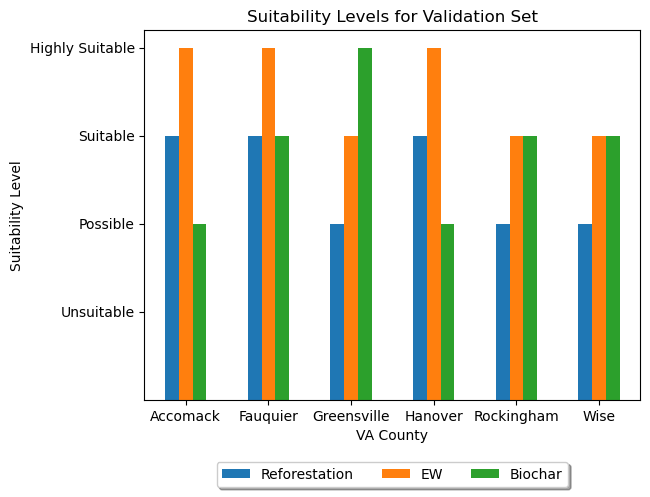

In [65]:
df.plot(kind='bar')
plt.xlabel('VA County')
plt.ylabel('Suitability Level')
plt.xticks(rotation=360)
plt.yticks(positions, custom_labels)
plt.title('Suitability Levels for Validation Set')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)

plt.show()